### Data Science Project Life-Cycle

#### 1. Domain Understanding - 대상 분야 이해
* 통신사의 비즈니스 모델 / 비즈니스 프로세스
* 통신사의 비즈니스 프로세스가 무엇일까?
* 통신사는 신규 고객 유치에 큰 시간과 노력을 들입니다.
* 그렇다면, 신규 고객 유치만 잘 되면 그것만으로 ok 인가?
* 기존 고객 이탈 방지 또한 잘 되어야 합니다.
* Churn - 우리 서비스 이용 하시다가 계약 해지(이탈) 하는 것
* 고객 이탈에 영향을 크게 미치는(또는 핵심 결정인자) 요인을 발굴
* 유사한 특성을 갖는 고객들이 있다면 이 고객들끼리 그룹으로 묶어서
* 각 그룹별 이탈률을 구하고 이탈률이 높은 고객군의 특징을 도출.

##### Load data

In [1]:
import pandas as pd
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(df.shape)
df.head().T

(7043, 21)


,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


##### 데이터 이해하기
* 고객정보, 상품정보, 결제정보 -> Churn
* feature -> label

##### 고객정보
* customerID - 고객 ID
* gender - 성별정보
* SeniorCitizen - 연장자 여부(65세 이상)
* Partner - 독신여부
* dependents - 부양가족 유무
* tenure - 서비스 이용기간

##### 가입 상품정보
* PhoneService - 전화 서비스 이용여부
* MultipleLines - 다중회선 이용여부
* InternetService - 인터넷 서비스 이용여부, 이용시 종류
* OnlineSecurity - 보안 서비스 이용여부
* OnlineBackup - 정보 백업서비스 이용여부
* DeviceProtection - 단말기 보험 서비스 이용여부
* TechSupport - 기술지원 서비스 이용여부
* StreamingTV - 스트리밍 TV 서비스 이용여부
* StreamingMovies - 스트리밍 영화 서비스 이용여부

##### 고객 결제정보
* Contract - 결제 갱신주기(매 월 / 1년마다 / 2년마다)
* PaymentMethod - 결제방식(온라인청구서, 지로통지 등)
* MonthlyCharges - 월 청구금액
* TotalCharges - 총 청구금액(계약기간동안 총 납부금액)

In [2]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,9067-YGSCA,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043,NaN,NaN,NaN,0.162147,0.368612,0,0,0,0,1
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043,NaN,NaN,NaN,32.3711,24.5595,0,9,29,55,72
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.sort_values(by='TotalCharges')['TotalCharges']

936           
3826          
4380          
753           
5218          
         ...  
6646    997.75
5598     998.1
3686    999.45
3353     999.8
2845     999.9
Name: TotalCharges, Length: 7043, dtype: object

In [4]:
df['TotalCharges'][936]

' '

In [5]:
print(df.shape)
df = df.loc[df['TotalCharges'] != ' ']
print(df.shape)
# 빈 칸 정보를 지웠으니 이제 데이터 타입을 숫자로 바꿀 수 있겠습니다.

(7043, 21)
(7032, 21)


In [6]:
float('33')

33.0

In [7]:
df['TotalCharges'] = df['TotalCharges'].apply(lambda x : float(x))
# 값 하나하나에 대해 float로 변환해주기 위해 float -> lambda 이용합니다.
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
str_col_desc = df.describe(include='object').T
# include 이용해 object 넣어주면 문자열이 들어있는 컬럼들만 선별해 보여줍니다.
# 문자열이기 때문에 기초통계인 평균, 표준편차는 없어요...
str_col_desc

,count,unique,top,freq
customerID,7032,7032,9067-YGSCA,1
gender,7032,2,Male,3549
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094


In [9]:
str_names = str_col_desc.loc[str_col_desc['unique'] < 10].T.columns
str_names

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [10]:
import numpy as np
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [11]:
for col in str_names:
    uniques = df[col].unique()
    print(col, uniques)

gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


##### 데이터 탐색
* 고객 이탈인 Churn 이 현재 문자열로 되어 있으므로 이를 용이하게 처리하기 위해
* No -> 0, Yes -> 1 로 변환 후 그래프를 그려보며 탐색합니다.

In [12]:
print(df['Churn'].unique())
df['Churn_no'] = df['Churn'].map({'No' : 0, 'Yes' : 1})
# .map 이용해 경우의 수 기반 컬럼을 숫자로 바꿔주었습니다.
print(df['Churn_no'].unique())

['No' 'Yes']
[0 1]


In [13]:
df.loc[df['gender'] == 'Male']['Churn_no'].mean()

0.26204564666103125

In [14]:
import numpy as np
df.groupby('gender').agg({'Churn_no' : np.mean})

,Churn_no
gender,
Female,0.269595
Male,0.262046


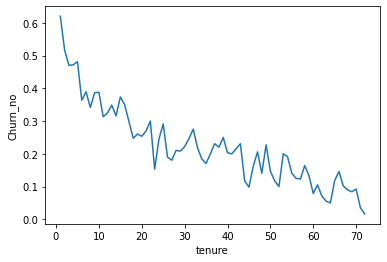

In [15]:
import seaborn as sns
ten_chu = df.groupby('tenure').agg({'Churn_no' : np.mean}).reset_index()
# 계약기간으로 group하여 이탈률 컬럼을 평균 내었습니다.
sns.lineplot(data=ten_chu, x='tenure', y='Churn_no')
# 계약기간이 길어질수록 이탈률이 낮아진다는 것을 알 수 있습니다.

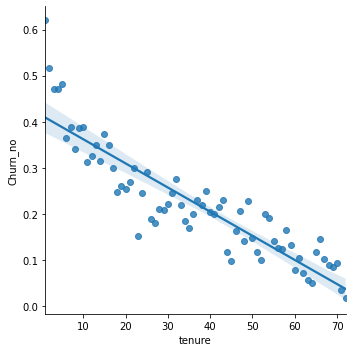

In [16]:
sns.lmplot(data=ten_chu, x='tenure', y='Churn_no')
# 추세선, 회귀선 개념을 이용하여 계약기간과 이탈률 관계를 표현

In [17]:
ten_chu

,tenure,Churn_no
0,1,0.619902
1,2,0.516807
2,3,0.470000
3,4,0.471591
4,5,0.481203
...,...,...
67,68,0.090000
68,69,0.084211
69,70,0.092437
70,71,0.035294


##### Multi-index aggregation
* groupby 적용시 멀티인덱스(기준을 하나가 아닌 여러 개로 정함)

In [18]:
sampler = df.groupby(['tenure', 'Dependents']).agg({'Churn_no' : np.mean}).reset_index()
# 기존에 다룬 groupby에서 반 발짝 더 나아갑니다.
# Dependents 기준으로 한 번 더 묶어줍니다.
sampler

,tenure,Dependents,Churn_no
0,1,No,0.632613
1,1,Yes,0.557692
2,2,No,0.538095
3,2,Yes,0.357143
4,3,No,0.488095
...,...,...,...
139,70,Yes,0.063830
140,71,No,0.038095
141,71,Yes,0.030769
142,72,No,0.020000


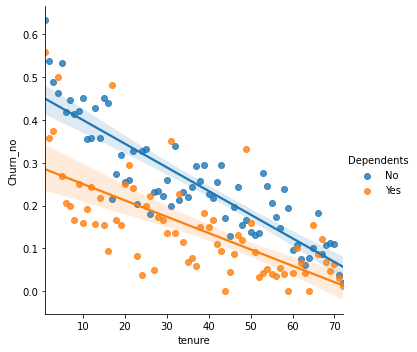

In [19]:
sns.lmplot(data=sampler, x='tenure', y='Churn_no', hue='Dependents')
# hue 기능을 이용하여 한 그래프에서 hue로 색깔 변화를 보며 확인
# 부양가족이 있는 고객은 이탈률이 더 낮음을 유추 가능

In [20]:
str_names

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

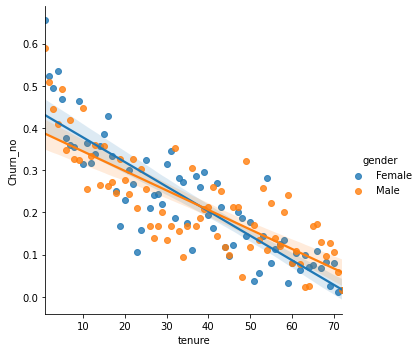

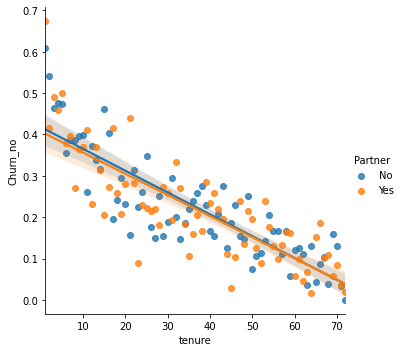

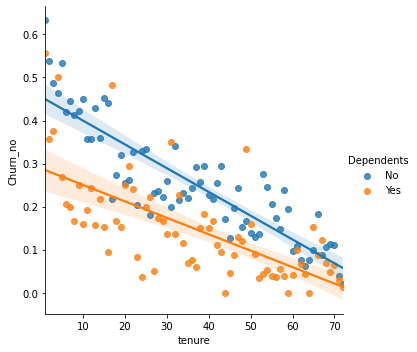

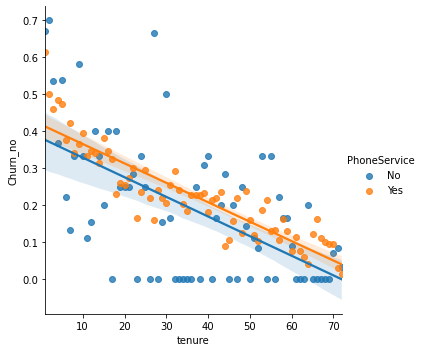

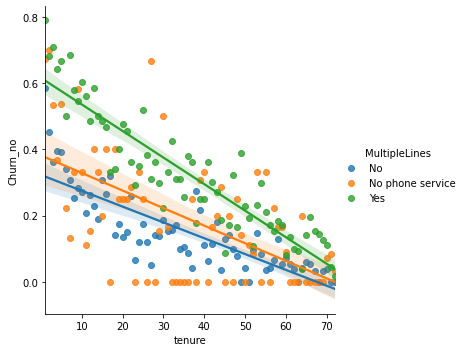

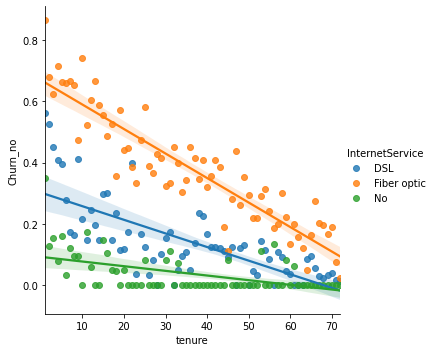

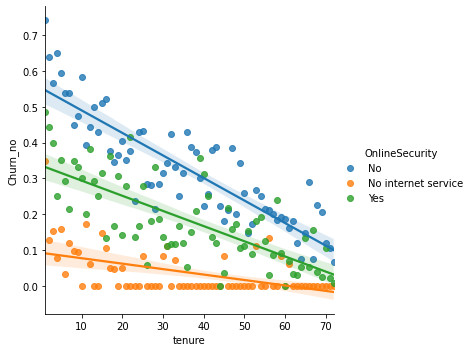

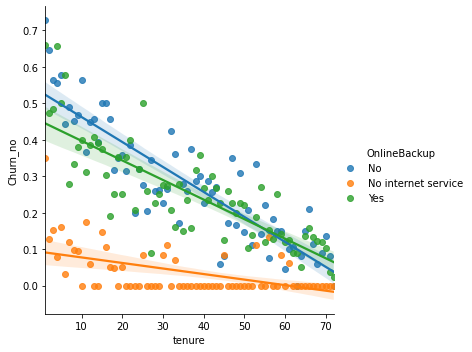

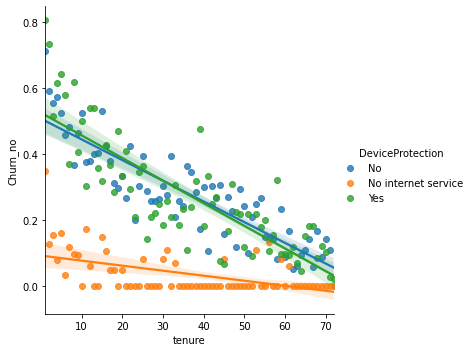

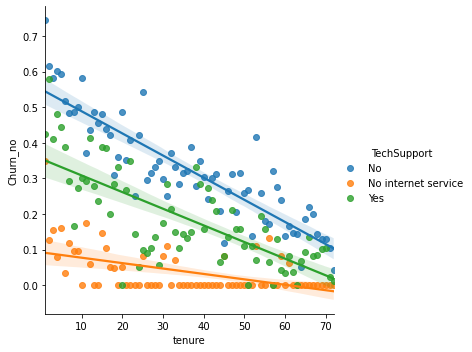

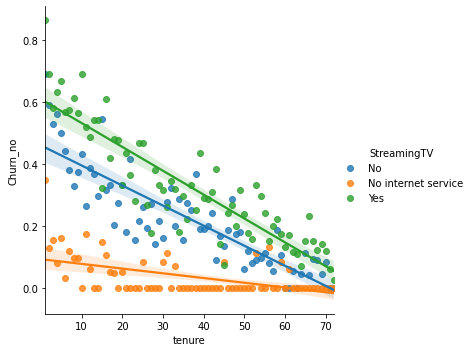

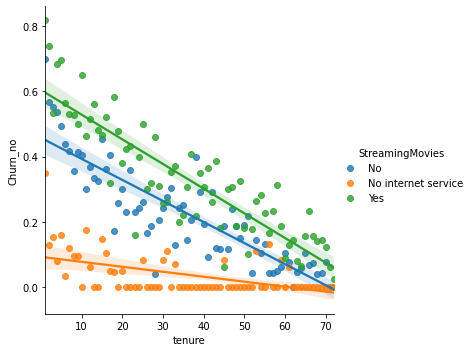

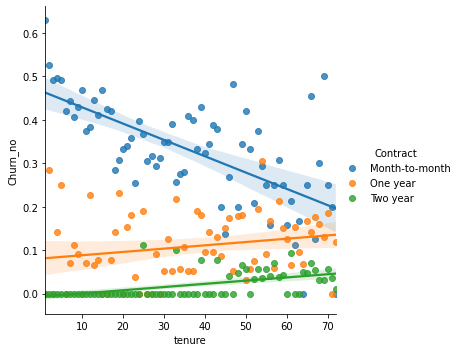

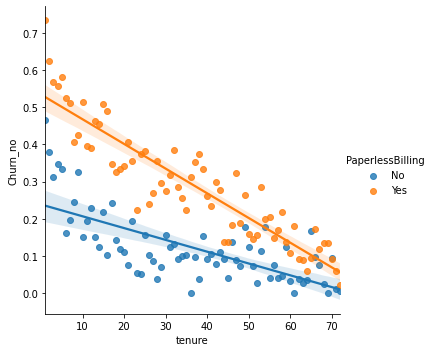

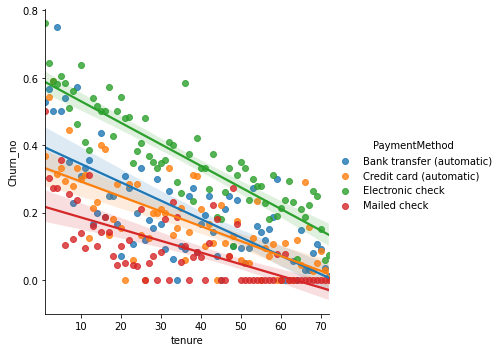

In [21]:
for hue in str_names:
    if hue == 'Churn' : continue
    sampler = df.groupby(['tenure', hue]).agg({'Churn_no' : np.mean}).reset_index()
    sns.lmplot(data=sampler, x='tenure', y='Churn_no', hue=hue)

#### 계약기간과 이탈률을 시각화 해 본 결과 컬럼별 시사점:

##### 고객정보 기반
* 성별에 따른 차이는 발견되지 않았습니다.
* 독신여부에 대한 차이는 발생하지 않았습니다.
* 부양가족이 없으면 이탈률이 높습니다.

##### 서비스 종류 기반
* 전화 서비스 여부에 따른 차이는 발견되지 않았습니다.
* 다중회선 사용고객의 경우 이탈률이 높았습니다.(돈을 더 낼 수록)
* 인터넷 서비스 이용시 인터넷 속도가 높을수록 이탈률이 높았습니다.(돈을 더 낼 수록)
* 보안 서비스 이용을 하지 않을수록 이탈률이 더 높았습니다.(돈을 안 낼 수록)
* 데이터 백업 서비스, 기기 보호 서비스는 차이가 발생하지 않았습니다.
* 기술지원 서비스를 받지 않을수록 이탈률이 더 높았습니다.(돈을 안 낼 수록)
* 스트리밍 TV, 영화 서비스는 받는 경우 이탈률이 더 높았습니다.(돈을 더 낼 수록)

##### 계약 정보 기반
* 갱신주기가 길어질수록 이탈률이 낮았습니다.
* 갱신주기가 년으로 긴 경우에는 기간이 길어질수록 이탈률이 높아짐.
* 청구서 형태의 경우 paperless(통지서 x) 이탈률이 높았습니다.
* 결제방식의 경우 전자통지서가 가장 이탈률이 높았고
* 지로통지서(우리 집 우체통으로 오는 것)가 가장 낮았습니다.
* 자동결제의 경우 중간 정도의 이탈률을 보였습니다.

##### 그렇다면 차이가 발생하지 않은 컬럼은 의미가 없는 것인가?
* x 축 tenure, y 축 이탈률 관점으로 보았고
* 이 틀 안에서만 보았기 때문에 다른 관점(틀)에서는 차이가 발생할 여지가 있음.
* 예) 지금은 전체 고객들을 대상으로 본 것이지만, 
* 특정 기준으로 선 분류한 고객에 대해서는 차이가 있을수도 있습니다.

### 데이터 준비 단계
* 이상치 판별 / 처리
* 스케일링
* 경우의 수 컬럼을 숫자로 변환
* train / test split - 공부 / 시험 데이터 셋 분할

### 이상치란 무엇인가?
##### outlier - 정상 / 이상 - '이상' 하다고 판단하는 기준이 무엇일까?
* 데이터 상 기준을 정해서 기준점을 넘어가면 이상치.
* 따로 분리해서 특별관리하거나 제거하거나 경계선의 값으로 채워넣습니다.
* 롯데백화점은 연 1억 이상 누적결제하면 VVIP, LENITH등급으로
* 데이터상 이상치인 고객들을 VVIP 관리합니다.

##### IQR 이용하여 컬럼의 이상치를 판별하는 방법
* Inter Quartile Range
* Inter - a 와 b 사이라는 의미
* Range - 범위라는 의미
* 데이터를 크기 순으로 정렬했을 때 25% 순서와 75% 순서의 값을 뺀 것을 이용합니다.

In [22]:
interested=['25%', '75%']
for_iqr = df.describe().T[interested].T['TotalCharges']
Q = for_iqr[1] - for_iqr[0]
max_lim = for_iqr[1] + (1.5 * Q)
min_lim = for_iqr[0] - (1.5 * Q)
print(max_lim)
print(min_lim)

8884.66875
-4688.481250000001


In [23]:
df.loc[df['TotalCharges'] > max_lim]
# 데이터 셋의 TotalCharges 컬럼에 대하여
# IQR 판별기준으로 높은 이상치가 있는지 알아보았습니다.
# 이상치가 판별되지 않았습니다.

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_no


##### 이상치 판별할 수 있는 다양한 방법들
* MAD(Median Absolute Deviation) - IQR 이용과 유사한 접근법(한 컬럼만으로 판별 가능)
* Monte Carlo, Hotelling's T2, SPE(residual) - 알고리즘 실행 결과를 이용

##### scaling
* 변수의 범위를 조정해주는 것, 어떤 컬럼은 1의자리 / 어떤 컬럼은 1000의 자리?
* 컬럼의 단위가 크면 단위가 작은 컬럼에 비해 알고리즘에 미치는 영향이 큼
* 이 영향을 최소화하기 위한 작업
* min-max scaling, standard-scaling -> 알코반에서 다루는 부분
* min-max scaling -> 모든 컬럼에 대해 0 ~ 1 사이로 맞춰주는 것
* standard scaling -> 모든 컬럼에 대해 평균(0), 표준편차(1)를 맞춰주는 것
* robust-scaling -> 모든 컬럼에 대해 중위수(0), IQR(1)을 맞춰주는 것

##### min-max scaling
* 최소값을 0, 최대값을 1로 조정해줍니다.
* 곱하기의 성질 -> 0 과 곱하면 0이 된다.

In [30]:
min_val = df['TotalCharges'].min()
df['sample'] = df['TotalCharges'] - min_val
df['TotalCharges_minmax'] = df['sample'] / df['sample'].max()
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_no,sample,TotalCharges_minmax
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.265785,2264.500441,0.261309
std,0.368844,24.545260,30.085974,2266.771362,0.441782,2266.771362,0.261571
min,0.000000,1.000000,18.250000,18.800000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.587500,401.450000,0.000000,382.650000,0.044155
50%,0.000000,29.000000,70.350000,1397.475000,0.000000,1378.675000,0.159090
75%,0.000000,55.000000,89.862500,3794.737500,1.000000,3775.937500,0.435719
max,1.000000,72.000000,118.750000,8684.800000,1.000000,8666.000000,1.000000


##### standard scaling
* 평균을 0, 표준편차를 1로 조정해줍니다.
* 평균은 일괄 더하기/빼기하면 더하기/빼기 한 만큼 움직입니다.
* 표준편차는 일괄 곱하기/나누기하면 곱하기/나누기 한 만큼 움직입니다.

In [36]:
mean_val = df['TotalCharges'].mean()
std_val = df['TotalCharges'].std()

df['sample'] = df['TotalCharges'] - mean_val
df['TotalCharges_std'] = df['sample'] / std_val
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_no,sample,TotalCharges_minmax,TotalCharges_std
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7.032000e+03,7032.000000,7.032000e+03
mean,0.162400,32.421786,64.798208,2283.300441,0.265785,-3.848539e-12,0.261309,-1.724951e-15
std,0.368844,24.545260,30.085974,2266.771362,0.441782,2.266771e+03,0.261571,1.000000e+00
min,0.000000,1.000000,18.250000,18.800000,0.000000,-2.264500e+03,0.000000,-9.989982e-01
25%,0.000000,9.000000,35.587500,401.450000,0.000000,-1.881850e+03,0.044155,-8.301898e-01
50%,0.000000,29.000000,70.350000,1397.475000,0.000000,-8.858254e+02,0.159090,-3.907873e-01
75%,0.000000,55.000000,89.862500,3794.737500,1.000000,1.511437e+03,0.435719,6.667797e-01
max,1.000000,72.000000,118.750000,8684.800000,1.000000,6.401500e+03,1.000000,2.824061e+00


In [49]:
mean_val = df['tenure'].mean()
std_val = df['tenure'].std()

df['sample'] = df['tenure'] - mean_val
df['tenure_std'] = df['sample'] / std_val
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_no,sample,TotalCharges_minmax,TotalCharges_std,MonthlyCharges_std,gender_num,Partner_num,Dependents_num,PhoneService_num,PaperlessBilling_num,DSL,Fiber optic,No,tenure_std
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7.032000e+03,7032.000000,7.032000e+03,7.032000e+03,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7.032000e+03
mean,0.162400,32.421786,64.798208,2283.300441,0.265785,-1.470698e-14,0.261309,-1.724951e-15,-1.356108e-15,0.495307,0.482509,0.298493,0.903299,0.592719,0.343572,0.440273,0.216155,-1.028756e-16
std,0.368844,24.545260,30.085974,2266.771362,0.441782,2.454526e+01,0.261571,1.000000e+00,1.000000e+00,0.500014,0.499729,0.457629,0.295571,0.491363,0.474934,0.496455,0.411650,1.000000e+00
min,0.000000,1.000000,18.250000,18.800000,0.000000,-3.142179e+01,0.000000,-9.989982e-01,-1.547173e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.280157e+00
25%,0.000000,9.000000,35.587500,401.450000,0.000000,-2.342179e+01,0.044155,-8.301898e-01,-9.709078e-01,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-9.542285e-01
50%,0.000000,29.000000,70.350000,1397.475000,0.000000,-3.421786e+00,0.159090,-3.907873e-01,1.845309e-01,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-1.394072e-01
75%,0.000000,55.000000,89.862500,3794.737500,1.000000,2.257821e+01,0.435719,6.667797e-01,8.330889e-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,9.198605e-01
max,1.000000,72.000000,118.750000,8684.800000,1.000000,3.957821e+01,1.000000,2.824061e+00,1.793254e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.612459e+00


In [39]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [40]:
mapper = {'Male' : 0, 'Female' : 1}
df['gender_num'] = df['gender'].map(mapper)
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_no,sample,TotalCharges_minmax,TotalCharges_std,MonthlyCharges_std,gender_num
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7.032000e+03,7032.000000,7.032000e+03,7.032000e+03,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.265785,-4.053186e-14,0.261309,-1.724951e-15,-1.356108e-15,0.495307
std,0.368844,24.545260,30.085974,2266.771362,0.441782,3.008597e+01,0.261571,1.000000e+00,1.000000e+00,0.500014
min,0.000000,1.000000,18.250000,18.800000,0.000000,-4.654821e+01,0.000000,-9.989982e-01,-1.547173e+00,0.000000
25%,0.000000,9.000000,35.587500,401.450000,0.000000,-2.921071e+01,0.044155,-8.301898e-01,-9.709078e-01,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000,5.551792e+00,0.159090,-3.907873e-01,1.845309e-01,0.000000
75%,0.000000,55.000000,89.862500,3794.737500,1.000000,2.506429e+01,0.435719,6.667797e-01,8.330889e-01,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,5.395179e+01,1.000000,2.824061e+00,1.793254e+00,1.000000


In [41]:
# yes/no 로 2가지 경우만 있는 컬럼들입니다.
yn = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in yn:
    df[col + '_num'] = df[col].map({'Yes' : 1, 'No' : 0})
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_no,sample,TotalCharges_minmax,TotalCharges_std,MonthlyCharges_std,gender_num,Partner_num,Dependents_num,PhoneService_num,PaperlessBilling_num
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7.032000e+03,7032.000000,7.032000e+03,7.032000e+03,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.265785,-4.053186e-14,0.261309,-1.724951e-15,-1.356108e-15,0.495307,0.482509,0.298493,0.903299,0.592719
std,0.368844,24.545260,30.085974,2266.771362,0.441782,3.008597e+01,0.261571,1.000000e+00,1.000000e+00,0.500014,0.499729,0.457629,0.295571,0.491363
min,0.000000,1.000000,18.250000,18.800000,0.000000,-4.654821e+01,0.000000,-9.989982e-01,-1.547173e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.587500,401.450000,0.000000,-2.921071e+01,0.044155,-8.301898e-01,-9.709078e-01,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000,5.551792e+00,0.159090,-3.907873e-01,1.845309e-01,0.000000,0.000000,0.000000,1.000000,1.000000
75%,0.000000,55.000000,89.862500,3794.737500,1.000000,2.506429e+01,0.435719,6.667797e-01,8.330889e-01,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,5.395179e+01,1.000000,2.824061e+00,1.793254e+00,1.000000,1.000000,1.000000,1.000000,1.000000


##### 경우의 수 컬럼 처리법
* 기존에 배운 방식 - 기준을 정했을 때 정도의 차이가 발생해 순서를 매길 수 있는지?
* one-hot encoding 이라는 신개념 적용

In [43]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

##### DSL, Fiber optic 정보 이해를 위해 도메인 이해를 적용합니다.
* 우리나라에서 90's 후반 ~ 00's 초까지 ADSL, VDSL 서비스가 있었습니다.
* 소위 말하는 광케이블이 아닌 전화선을 이용한 인터넷 서비스입니다.
* 속도의 차이(가격의 차이)로 정도의 차이를 도출할 수 있겠습니다.
* 이 관점으로 접근하면 'No' 가 0, 'DSL' 이 0.5, 'Fiber optic' 이 1 입니다.

In [47]:
is_df = pd.get_dummies(df['InternetService'])
df = pd.concat([df, is_df], axis=1)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TotalCharges_std,MonthlyCharges_std,gender_num,Partner_num,Dependents_num,PhoneService_num,PaperlessBilling_num,DSL,Fiber optic,No
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,-0.994123,-1.161611,1,1,0,0,1,1,0,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,-0.173727,-0.260859,0,0,0,1,0,1,0,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,-0.959581,-0.363897,0,0,0,1,1,1,0,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,-0.195234,-0.747797,0,0,0,0,0,1,0,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,-0.940391,0.196164,1,0,0,1,1,0,1,0


In [48]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_no,sample,TotalCharges_minmax,TotalCharges_std,MonthlyCharges_std,gender_num,Partner_num,Dependents_num,PhoneService_num,PaperlessBilling_num,DSL,Fiber optic,No
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7.032000e+03,7032.000000,7.032000e+03,7.032000e+03,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.265785,-4.053186e-14,0.261309,-1.724951e-15,-1.356108e-15,0.495307,0.482509,0.298493,0.903299,0.592719,0.343572,0.440273,0.216155
std,0.368844,24.545260,30.085974,2266.771362,0.441782,3.008597e+01,0.261571,1.000000e+00,1.000000e+00,0.500014,0.499729,0.457629,0.295571,0.491363,0.474934,0.496455,0.411650
min,0.000000,1.000000,18.250000,18.800000,0.000000,-4.654821e+01,0.000000,-9.989982e-01,-1.547173e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.587500,401.450000,0.000000,-2.921071e+01,0.044155,-8.301898e-01,-9.709078e-01,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000,5.551792e+00,0.159090,-3.907873e-01,1.845309e-01,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,55.000000,89.862500,3794.737500,1.000000,2.506429e+01,0.435719,6.667797e-01,8.330889e-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,5.395179e+01,1.000000,2.824061e+00,1.793254e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### 지도학습과 비지도학습
* 목적에 따라 알고리즘을 나누는 기준 -> 지도학습과 비지도학습
* 정답을 알고 있어서 채점이 가능한 경우(label 존재)에만 사용하는 알고리즘 -> 지도학습
* 정답을 모르고 있고, 정답 설정이 어려운 경우 알고리즘이 데이터의 
* 패턴을 찾게 만들고자 함, 사람이 패턴을 해석하고 의미 부여. -> 비지도
* 군집 알고리즘 -> 비지도학습

In [50]:
df.describe().columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn_no',
       'sample', 'TotalCharges_minmax', 'TotalCharges_std',
       'MonthlyCharges_std', 'gender_num', 'Partner_num', 'Dependents_num',
       'PhoneService_num', 'PaperlessBilling_num', 'DSL', 'Fiber optic', 'No',
       'tenure_std'],
      dtype='object')

In [52]:
from sklearn.cluster import KMeans # scaling 후 진행해야 합니다.
features = ['tenure_std', 'MonthlyCharges_std', 'TotalCharges_std']
model = KMeans(n_clusters=4)
model.fit(df[features])

KMeans(n_clusters=4)

In [54]:
cc = model.cluster_centers_
# cc 의 결과는 가로가 4개이고 세로가 3개입니다.
# 알고리즘에 넣은 기준으로 n_clusters=4 이므로 그룹의 개수는 4개이고
# features 는 3개이므로 cc의 결과 가로와 세로는 각각
# 가로가 각 그룹을 의미하고
# 세로가 해당 그룹의 특성을 나타냅니다.
# 그룹으로 묶었을 때 각 컬럼별 평균값, groupby -> agg와 유사합니다.
cc

array([[-0.90167564, -1.09746987, -0.87306478],
       [ 1.10467479,  0.94940909,  1.44226443],
       [ 0.86344706, -0.98984883, -0.19414701],
       [-0.69162518,  0.5317789 , -0.45451503]])

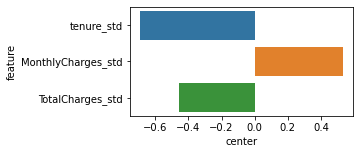

In [67]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
fig.set_size_inches(4, 2)
for_plot = pd.DataFrame()
for_plot['center'] = cc[3]
for_plot['feature'] = features
sns.barplot(data=for_plot, x='center', y='feature', ax=ax1)

In [71]:
print(df.shape)
print(len(model.labels_))
np.unique(model.labels_)

(7032, 35)
7032


array([0, 1, 2, 3])

In [73]:
df.describe().columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn_no',
       'sample', 'TotalCharges_minmax', 'TotalCharges_std',
       'MonthlyCharges_std', 'gender_num', 'Partner_num', 'Dependents_num',
       'PhoneService_num', 'PaperlessBilling_num', 'DSL', 'Fiber optic', 'No',
       'tenure_std', 'cluster'],
      dtype='object')

In [72]:
df['cluster'] = model.labels_
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,gender_num,Partner_num,Dependents_num,PhoneService_num,PaperlessBilling_num,DSL,Fiber optic,No,tenure_std,cluster
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,1,1,0,0,1,1,0,0,-1.280157,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,0,0,0,1,0,1,0,0,0.064298,2
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,0,0,0,1,1,1,0,0,-1.239416,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,0,0,0,0,0,1,0,0,0.512450,2
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,1,0,0,1,1,0,1,0,-1.239416,3


In [74]:
df.groupby('cluster').agg({'Churn_no' : np.mean})

,Churn_no
cluster,
0,0.247642
1,0.153967
2,0.050043
3,0.482850


In [75]:
df.describe().columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn_no',
       'sample', 'TotalCharges_minmax', 'TotalCharges_std',
       'MonthlyCharges_std', 'gender_num', 'Partner_num', 'Dependents_num',
       'PhoneService_num', 'PaperlessBilling_num', 'DSL', 'Fiber optic', 'No',
       'tenure_std', 'cluster'],
      dtype='object')

In [92]:
interested = ['SeniorCitizen', 'Churn_no', 'TotalCharges_std',
       'MonthlyCharges_std', 'gender_num', 'Partner_num', 'Dependents_num',
       'PhoneService_num', 'PaperlessBilling_num', 'DSL', 'Fiber optic', 'No',
       'tenure_std']
high_risk = df.loc[df['cluster'] == 3][interested].describe().T.reset_index()
# 높은 이탈률을 보이는 그룹을 따로 필터링하여
# 각 컬럼별 기초통계량을 알아봅니다.
# 몇 가지 경우의 수 기반 컬럼들을 숫자로 바꿔놓았기 때문에 가능한 것입니다.
# 나중에 그래프 그리기 용이하게 만들기 위하여 .reset_index() 또한 실행 해
# index로 있는 features 정보를 컬럼으로 올려줍니다.
high_risk

,index,count,mean,std,min,25%,50%,75%,max
0,SeniorCitizen,2274.0,0.226913,0.418928,0.000000,0.000000,0.000000,0.000000,1.000000
1,Churn_no,2274.0,0.482850,0.499816,0.000000,0.000000,0.000000,1.000000,1.000000
2,TotalCharges_std,2274.0,-0.454228,0.421189,-0.980315,-0.842724,-0.518656,-0.133400,0.545908
3,MonthlyCharges_std,2274.0,0.531584,0.418387,-0.438683,0.201565,0.506940,0.840983,1.600473
4,gender_num,2274.0,0.501759,0.500107,0.000000,0.000000,1.000000,1.000000,1.000000
5,Partner_num,2274.0,0.366755,0.482025,0.000000,0.000000,0.000000,1.000000,1.000000
6,Dependents_num,2274.0,0.199208,0.399493,0.000000,0.000000,0.000000,0.000000,1.000000
7,PhoneService_num,2274.0,0.991645,0.091045,0.000000,1.000000,1.000000,1.000000,1.000000
8,PaperlessBilling_num,2274.0,0.721636,0.448292,0.000000,0.000000,1.000000,1.000000,1.000000
9,DSL,2274.0,0.230431,0.421201,0.000000,0.000000,0.000000,0.000000,1.000000


In [93]:
interested = ['index', 'mean']
for_plot = high_risk[interested]
for_plot

,index,mean
0,SeniorCitizen,0.226913
1,Churn_no,0.482850
2,TotalCharges_std,-0.454228
3,MonthlyCharges_std,0.531584
4,gender_num,0.501759
5,Partner_num,0.366755
6,Dependents_num,0.199208
7,PhoneService_num,0.991645
8,PaperlessBilling_num,0.721636
9,DSL,0.230431


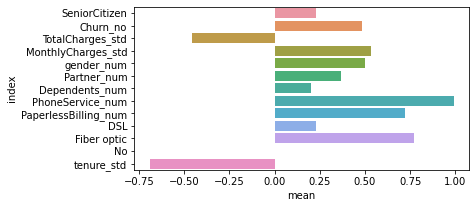

In [94]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
fig.set_size_inches(6, 3)
sns.barplot(data=for_plot, x='mean', y='index', ax=ax1)

### 군집의 개수 지정하는 방법?
* 1. 감으로 -> 그룹의 개수를 미리 알고 있는 경우
* 2. 평가지표로 확인 -> 실루엣 지표 적용( -1 ~ 1 사이, 1에 가까울수록 좋다.)
* 3. 그래프 그려서 눈으로 확인 -> elbow method

In [95]:
from sklearn.metrics import silhouette_score as sil
all_scores = []
for i in range(10):
    i = i + 2
    model = KMeans(n_clusters=i)
    # 군집 개수를 점점 증가시켜가며 새로운 모델 만드는 것을 반복합니다.
    model.fit(df[features])
    sil_score = sil(df[features], model.labels_)
    # 새로운 모델 만들 때마다 fit(학습) 하고 실루엣 방식으로 점수를 뽑아냅니다.
    elbow_score = model.inertia_
    score_dict = {'cluster_num' : i, 'sil_score' : sil_score, 'elbow' : elbow_score}
    all_scores.append(score_dict)
    # inertia는 elbow 방식으로 
    # 그래프 그리며 최적 군집 개수 파악하는 방식을 위한 코드입니다.
    # 군집 개수 몇 개였을 때 실루엣 점수 몇 점이었는지, 그리고 elbow 용 값이 얼마인지를
    # 딕셔너리로 만들어 줍니다.
score_df = pd.DataFrame(all_scores)

In [97]:
score_df.sort_values(by='sil_score').tail()

,cluster_num,sil_score,elbow
4,6,0.439756,2560.003941
3,5,0.443693,3107.774109
1,3,0.451657,6175.883361
2,4,0.472026,4144.046358
0,2,0.479551,9699.447975


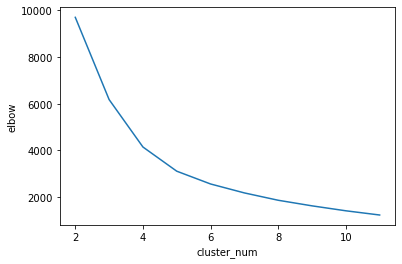

In [98]:
sns.lineplot(data=score_df, x='cluster_num', y='elbow')
# 기울기의 변화가 가장 큰(가장 크게 꺾이는) 지점이 최적 군집 개수입니다.
# 현재 명확하게 나오지는 않지만 그래도 4 지점에서 가장 크게 꺾임을 확인 가능합니다.

### PCA(Principal Component Analysis) - 주성분분석
* 무엇인가? -> 차원 축소, 변수 줄이기
* 만약 원본 데이터가 컬럼이 1000개 있다면 
* 이 데이터를 100% 설명하기 위해서 1000개의 컬럼이 필요.
* 차원 축소 기법을 이용하면 단 몇 개만으로도 90% 이상을 설명 가능.
* 1000개 중 5개만 중요한 것을 뽑아내는 개념이 아닙니다.
* 1000개를 조금씩 조합해서 만든 것입니다.

##### 식당에 100개의 식재료가 있다고 한다면
* 각 컬럼이 식재료이고 컬럼이 100개입니다.
* 한 row는 한 번 요리할 때 식재료를 얼마나 사용했는지를 나타냅니다.
* 이 식당에서는 3개의 베스트셀러 메뉴가 있는데, 전체 주문의 99%가 이 3개라면?
* 컬럼을 100개가 아니라, 베스트셀러 메뉴 3개만으로 99%의 정보를 보존할 수 있습니다.
* 차원축소로 100 -> 3 개로 변수를 축소하는 과정

In [113]:
from sklearn.decomposition import PCA
model = PCA(n_components=10)
features = ['SeniorCitizen', 'Churn_no', 'TotalCharges_std',
       'MonthlyCharges_std', 'gender_num', 'Partner_num', 'Dependents_num',
       'PhoneService_num', 'PaperlessBilling_num', 'DSL', 'Fiber optic', 'No',
       'tenure_std']
X = df[features]
PC = model.fit_transform(X)
transformed = pd.DataFrame(PC)
transformed['Churn_no'] = df['Churn_no']
transformed.head()

,0,1,2,3,4,5,6,7,8,9,Churn_no
0,-1.891681,0.081346,0.912350,0.394271,0.538869,0.535822,-0.005422,0.546504,-0.496053,0.524023,0.0
1,-0.373212,0.404107,0.727200,-0.475139,-0.501060,-0.626800,-0.056972,0.009138,-0.034682,-0.118649,0.0
2,-1.560446,-0.789314,0.834678,-0.167766,-0.479392,0.372553,0.086142,-0.441537,-0.173189,-0.423000,1.0
3,-0.432354,0.994018,0.895276,-0.626060,-0.490181,-0.365598,0.195724,-0.096377,0.066944,0.748491,0.0
4,-1.064061,-1.577304,-0.244892,-0.164251,0.494234,0.248043,0.006077,-0.417715,-0.133633,0.122641,1.0


In [114]:
df[features].head()

,SeniorCitizen,Churn_no,TotalCharges_std,MonthlyCharges_std,gender_num,Partner_num,Dependents_num,PhoneService_num,PaperlessBilling_num,DSL,Fiber optic,No,tenure_std
0,0,0,-0.994123,-1.161611,1,1,0,0,1,1,0,0,-1.280157
1,0,0,-0.173727,-0.260859,0,0,0,1,0,1,0,0,0.064298
2,0,1,-0.959581,-0.363897,0,0,0,1,1,1,0,0,-1.239416
3,0,0,-0.195234,-0.747797,0,0,0,0,0,1,0,0,0.512450
4,0,1,-0.940391,0.196164,1,0,0,1,1,0,1,0,-1.239416


In [115]:
model.explained_variance_ratio_

array([0.46266271, 0.21426186, 0.0683822 , 0.05668989, 0.04989137,
       0.04143397, 0.03049949, 0.02621385, 0.01948346, 0.01482694])

### PCA 수학적 설명?
* 컬럼끼리 공분산 구해서 공분산 행렬을 구합니다. - df[features].cov()
* 공분산 행렬은 가로 세로 길이가 같은 정방행렬(square matrix)
* 고유값, 고유벡터를 정방행렬에서 뽑아낼 수 있습니다.
* 고유값(eigen value) 의 크기 순으로 정렬할 수 있습니다.
* 크기가 가장 큰 고유값부터 정렬하면 순서를 갖습니다.
* 고유값과 고유벡터는 한 쌍으로 있습니다.
* 고유벡터 순서대로 PC1, PC2, PC3, ... 으로 이름을 붙입니다.

In [118]:
df[features].cov()

,SeniorCitizen,Churn_no,TotalCharges_std,MonthlyCharges_std,gender_num,Partner_num,Dependents_num,PhoneService_num,PaperlessBilling_num,DSL,Fiber optic,No,tenure_std
SeniorCitizen,0.136046,0.024530,0.037774,0.081099,0.000336,0.003125,-0.035540,0.000915,0.028320,-0.018967,0.046680,-0.027713,0.005785
Churn_no,0.024530,0.195171,-0.088128,0.085201,0.001887,-0.033112,-0.032980,0.001527,0.041560,-0.026047,0.067434,-0.041387,-0.156413
TotalCharges_std,0.037774,-0.088128,1.000000,0.651065,-0.000024,0.159450,0.029587,0.033402,0.077552,-0.024787,0.179106,-0.154319,0.825880
MonthlyCharges_std,0.081099,0.085201,0.651065,1.000000,0.006890,0.048886,-0.051411,0.073311,0.172926,-0.076639,0.390807,-0.314168,0.246862
gender_num,0.000336,0.001887,-0.000024,0.006890,0.250014,0.000345,-0.002368,0.001111,0.002924,-0.001801,0.002778,-0.000977,-0.002643
Partner_num,0.003125,-0.033112,0.159450,0.048886,0.000345,0.249730,0.103430,0.002717,-0.003427,-0.000248,0.000306,-0.000059,0.190852
Dependents_num,-0.035540,-0.032980,0.029587,-0.051411,-0.002368,0.103430,0.209425,-0.000146,-0.024764,0.011213,-0.037282,0.026069,0.074770
PhoneService_num,0.000915,0.001527,0.033402,0.073311,0.001111,0.002717,-0.000146,0.087362,0.002425,-0.063486,0.042581,0.020905,0.002328
PaperlessBilling_num,0.028320,0.041560,0.077552,0.172926,0.002924,-0.003427,-0.024764,0.002425,0.241438,-0.014793,0.079639,-0.064846,0.002370
DSL,-0.018967,-0.026047,-0.024787,-0.076639,-0.001801,-0.000248,0.011213,-0.063486,-0.014793,0.225562,-0.151287,-0.074275,0.006548
